In [1]:
from gurobipy import *
import gurobipy as gp

# type declaration
from typing import Dict, List


import pandas as pd

import numpy as np

%load_ext nb_black
%load_ext lab_black

import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go


# importing package
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
import random

random.seed(42)

<IPython.core.display.Javascript object>

# Q1

In [3]:
dict_swimmers = {
    ("N", "BA"): 40.1,
    ("N", "BR"): 41.7,
    ("N", "BU"): 41.1,
    ("N", "FR"): 33.3,
    ("M", "BA"): 39.6,
    ("M", "BR"): 37.6,
    ("M", "BU"): 31.9,
    ("M", "FR"): 31.2,
    ("L", "BA"): 35.3,
    ("L", "BR"): 37.9,
    ("L", "BU"): 36.2,
    ("L", "FR"): 33.1,
    ("A", "BA"): 30.6,
    ("A", "BR"): 34.1,
    ("A", "BU"): 33.3,
    ("A", "FR"): 29.1,
    ("C", "BA"): 36.9,
    ("C", "BR"): 37.2,
    ("C", "BU"): 29.0,
    ("C", "FR"): 31.6,
}

dict_swimmers_obj = [
    ("N", "BA"),
    ("N", "BR"),
    ("N", "BU"),
    ("N", "FR"),
    ("M", "BA"),
    ("M", "BR"),
    ("M", "BU"),
    ("M", "FR"),
    ("L", "BA"),
    ("L", "BR"),
    ("L", "BU"),
    ("L", "FR"),
    ("A", "BA"),
    ("A", "BR"),
    ("A", "BU"),
    ("A", "FR"),
    ("C", "BA"),
    ("C", "BR"),
    ("C", "BU"),
    ("C", "FR"),
]
names_list = ["N", "M", "L", "A", "C"]
types_lanes = ["BA", "BR", "BU", "FR"]

<IPython.core.display.Javascript object>

In [4]:
random.seed(42)
model = Model()
x = model.addVars(dict_swimmers, obj=dict_swimmers, vtype=GRB.BINARY, name="swimmers")
model.ModelSense = gp.GRB.MINIMIZE
model.addConstrs(gp.quicksum((x[(i, j)] for j in types_lanes)) <= 1 for i in names_list)

for j in types_lanes:
    model.addConstr(gp.quicksum((x[(i, j)] for i in names_list)) == 1)

model.optimize()
print("optimal value", model.objval)
model.printAttr("X")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-10
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x69b34e51
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 136.3000000
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Found heuristic solution: objective 135.8000000

Root relaxation: objective 1.287000e+02, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work


<IPython.core.display.Javascript object>

# Q2a Standard Capacity allocation problem

Use simulation to determine the optimal booking policy to maximize expected revenue: for every booking limit between 20 and 80, simulate 10000 paths and compute the expected revenue. Plot the expected revenue as a function of the booking limit. (30 points)





In [5]:
random.seed(42)
booklimit = list(range(20, 81))
lam_customerP1 = np.random.poisson(lam=75, size=10000)
lam_customerP2 = np.random.poisson(lam=50, size=10000)

profit = []
for lim in booklimit:
    salePeriod1 = np.where(lam_customerP1 <= lim, lam_customerP1, lim)
    ticketsLeft = 100 - salePeriod1
    salePeriod2 = np.where(lam_customerP2 > ticketsLeft, ticketsLeft, lam_customerP2)
    revenues = 150 * salePeriod1 + 500 * salePeriod2
    profit.append([lim, np.mean(revenues)])

<IPython.core.display.Javascript object>

In [6]:
df_profit = pd.DataFrame(profit, columns=["Alpha", "Expected Revenue"])

<IPython.core.display.Javascript object>

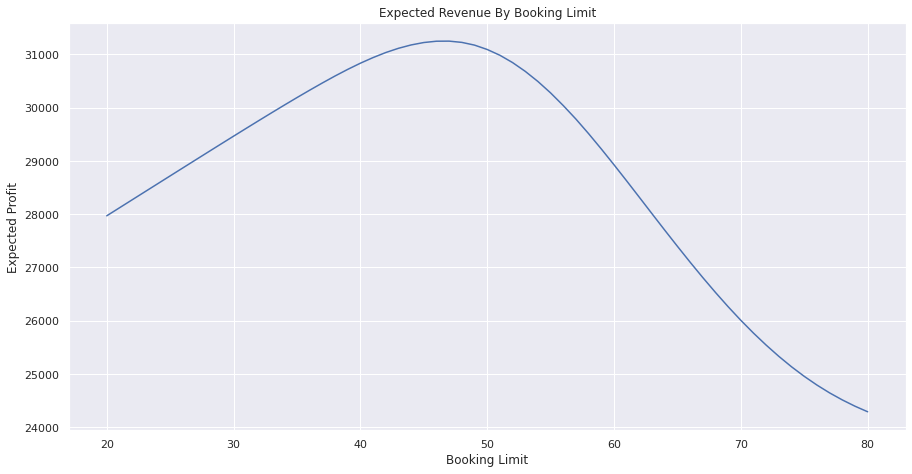

<IPython.core.display.Javascript object>

In [7]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 7.5))
plt.plot(df_profit["Alpha"], df_profit["Expected Revenue"], label="line 1")
plt.title("Expected Revenue By Booking Limit")
plt.xlabel("Booking Limit")
plt.ylabel("Expected Profit")
# plt.legend()
plt.show()

In [8]:
df_profit.sort_values(by="Expected Revenue", ascending=False)

,Alpha,Expected Revenue
27,47,31250.090
26,46,31248.535
28,48,31226.550
25,45,31223.900
24,44,31178.550
...,...,...
56,76,24791.750
57,77,24644.295
58,78,24512.625
59,79,24394.500


<IPython.core.display.Javascript object>

# Q2b

In [9]:
lam_customerP1 = np.random.poisson(lam=75, size=10000)
lam_customerP2 = np.random.poisson(lam=50, size=10000)
price_range = list(range(100, 301))
booking_limit = list(range(20, 81))


profit = []
for alpha in booking_limit:
    for prp in price_range:
        # draw customer numbers period 1
        paying_customers_p1 = np.where(lam_customerP1 <= 0, lam_customerP1, alpha)

        # define the number of seats available after period 1 sales
        n_seats = 100 - paying_customers_p1

        # Define the shortage in saeats based on period 2 demans
        period2_shortage = np.where(
            n_seats < lam_customerP2, lam_customerP2 - n_seats, 0
        )

        # draw how many custoemrs want to be refunded
        refunded = np.random.binomial(paying_customers_p1, ((prp - 100) / 200), 10000)
        period1_refunds = np.where(
            refunded >= period2_shortage, period2_shortage, refunded
        )

        # fetch the number of seats
        n_seats_new = n_seats + period1_refunds

        paying_customers_p2 = np.where(
            lam_customerP2 > n_seats_new, n_seats_new, lam_customerP2
        )

        # expected revenue
        exprevenue = ((paying_customers_p1 * 150) - (period1_refunds * prp)) + (
            paying_customers_p2 * 500
        )

        # save the results
        profit.append([alpha, prp, np.mean(exprevenue)])

<IPython.core.display.Javascript object>

In [10]:
df_profit_2 = pd.DataFrame(
    profit, columns=["Alpha", "Refunded Tickets", "Expected Revenue"]
)

df_profit_2_max = df_profit_2.loc[
    df_profit_2.groupby(["Alpha"])["Expected Revenue"].idxmax()
]

<IPython.core.display.Javascript object>

In [11]:
# idx = (
#     df_profit_2.groupby(["Alpha"])["Expected Revenue"].transform(max)
#     == df_profit_2["Expected Revenue"]
# )
# df_profit_2_max = df_profit_2[idx].drop_duplicates(
#     subset=["Alpha", "Expected Revenue"], keep="first"
# )

<IPython.core.display.Javascript object>

In [12]:
df_profit_2_max.sort_values(by="Expected Revenue", ascending=False)

,Alpha,Refunded Tickets,Expected Revenue
7297,56,161,32201.7545
7501,57,164,32200.7472
7096,55,161,32195.0507
7704,58,166,32189.6072
6899,54,165,32176.2830
...,...,...,...
830,24,126,28588.1118
610,23,107,28438.1679
402,22,100,28288.2000
201,21,100,28138.2000


<IPython.core.display.Javascript object>

In [13]:
tmp = pd.merge(
    left=df_profit,
    right=df_profit_2_max,
    left_on="Alpha",
    right_on="Alpha",
    how="inner",
)
tmp["callable_products_scheme_value"] = (
    tmp["Expected Revenue_y"] - tmp["Expected Revenue_x"]
)

<IPython.core.display.Javascript object>

In [14]:
tmp.callable_products_scheme_value.sum()

135590.92930000002

<IPython.core.display.Javascript object>

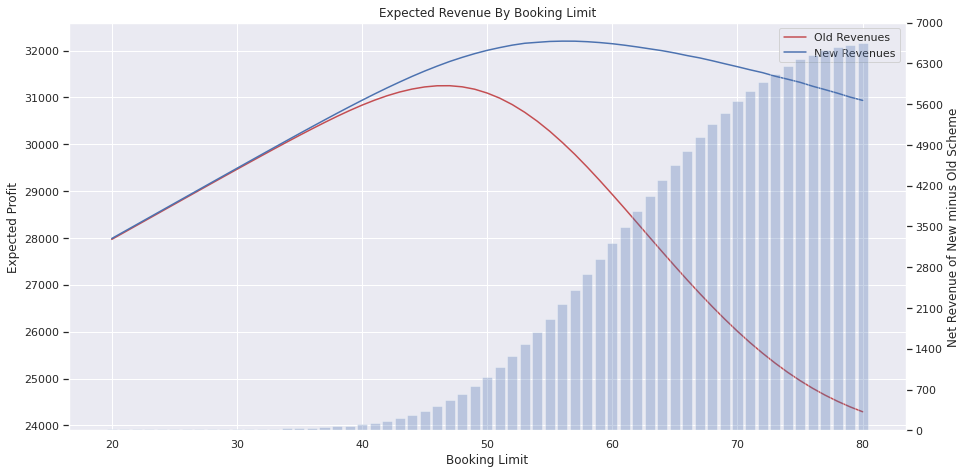

<IPython.core.display.Javascript object>

In [15]:
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.set_theme()
ax2 = ax.twinx()
ax.plot(df_profit["Alpha"], df_profit["Expected Revenue"], label="Old Revenues", c="r")
ax.plot(
    df_profit_2_max["Alpha"], df_profit_2_max["Expected Revenue"], label="New Revenues"
)

ax2.bar(
    tmp["Alpha"],
    tmp["callable_products_scheme_value"],
    label="Value of Scheme",
    alpha=0.3,
)

# ax2.bar(
#     x=df_profit_2_max["Alpha"], height=df_profit_2_max["Refunded Tickets"], alpha=0.3
# )

ax2.set_yticks(
    np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks()))
)
ax2.grid(False)
plt.title("Expected Revenue By Booking Limit")
ax.set_xlabel("Booking Limit")
ax.set_ylabel("Expected Profit")
ax2.set_ylabel("Net Revenue of New minus Old Scheme")
ax.legend()
plt.show()

## q3 A

In [16]:
Scenario = ["A", "B", "C"]
distros = (1, 2, 3, 4)
Warehouse = ("W_A", "W_B")

prob_scenario = {"A": 0.3, "B": 0.2, "C": 0.5}
warehouse_pf = {"W_A": 1, "W_B": 1.5}


Demand = {
    ("A", 1): 5,
    ("A", 2): 3,
    ("A", 3): 7.8,
    ("A", 4): 4,
    ("B", 1): 3,
    ("B", 2): 1,
    ("B", 3): 6,
    ("B", 4): 3,
    ("C", 1): 4.2,
    ("C", 2): 4.1,
    ("C", 3): 3,
    ("C", 4): 5.4,
}
Transportation_Costs = {
    ("W_A", 1): 1.5,
    ("W_A", 2): 2,
    ("W_A", 3): 2,
    ("W_A", 4): 3,
    ("W_B", 1): 2,
    ("W_B", 2): 1.2,
    ("W_B", 3): 1.1,
    ("W_B", 4): 2.5,
}


model = gp.Model()
model.ModelSense = gp.GRB.MAXIMIZE

# Frist stage model definition
x = model.addVars(Warehouse, vtype=gp.GRB.INTEGER, name="Product_input")

# SecondStageModel Definition
# define the varaibles
dist_ware_scen = model.addVars(
    Warehouse, distros, Scenario, vtype=gp.GRB.INTEGER, name="Transport"
)
invd = model.addVars(distros, Scenario, vtype=gp.GRB.INTEGER, name="Inventory")
soldd = model.addVars(distros, Scenario, vtype=gp.GRB.INTEGER, name="Sold")

# set the obkjectvie for a sale price of 20 per distribution center and a 10 bucks cost per product
model.setObjective(
    gp.quicksum(
        20 * prob_scenario[scenario] * soldd[distro, scenario]
        for scenario in Scenario
        for distro in distros
    )
    # price times allocation costs from warehouse
    - gp.quicksum(
        x[warehouse] * (10 + warehouse_pf[warehouse]) for warehouse in Warehouse
    )
    # probability, distribuion, and from warehouse
    - gp.quicksum(
        dist_ware_scen[warehouse, distro, scenario]
        * Transportation_Costs[warehouse, distro]
        * prob_scenario[scenario]
        for scenario in Scenario
        for warehouse in Warehouse
        for distro in distros
    )
)

# a distibution can only send what it receives
model.addConstrs(
    (
        invd[distro, scenario]
        == gp.quicksum(
            dist_ware_scen[warehouse, distro, scenario] for warehouse in Warehouse
        )
        for distro in distros
        for scenario in Scenario
    ),
    name="SendReceiveLimit",
)

# Any distibution centreer can only reveive as much as it reveicves from warehouse in give distribution
model.addConstrs(
    (
        gp.quicksum(dist_ware_scen[warehouse, distro, scenario] for distro in distros)
        <= x[warehouse]
        for warehouse in Warehouse
        for scenario in Scenario
    ),
    name="ReceiveConstrain",
)

# Distrobs can only sale based on a given demand based on a given scenario
model.addConstrs(
    (
        soldd[distro, scenario] <= Demand[scenario, distro] * 1000
        for distro in distros
        for scenario in Scenario
    ),
    name="SaleConstrain",
)
# Distros can only sale what is in the inventory based on a given scenario
model.addConstrs(
    (
        soldd[distro, scenario] <= invd[distro, scenario]
        for distro in distros
        for scenario in Scenario
    ),
    name="SaleConstrain",
)

model.optimize()
print("Optimal Value:", model.Objval)
model.printAttr("X")

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 42 rows, 50 columns and 102 nonzeros
Model fingerprint: 0x8ad7c937
Variable types: 0 continuous, 50 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 8e+03]
Found heuristic solution: objective -0.0000000
Presolve removed 24 rows and 12 columns
Presolve time: 0.00s
Presolved: 18 rows, 38 columns, 66 nonzeros
Variable types: 0 continuous, 38 integer (0 binary)

Root relaxation: objective 1.049990e+05, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0        

<IPython.core.display.Javascript object>

## q3 b

#### B1 & B2

In [17]:
TransportationCosts = pd.read_csv(
    "/home/angelo/Documents/Uni/Courses/Management Science/MM_Code_repo/data/TranportationCosts.csv",
    encoding="latin-1",
)
Demand = pd.read_csv(
    "/home/angelo/Documents/Uni/Courses/Management Science/MM_Code_repo/data/demand.csv",
    encoding="latin-1",
)

Scenario = Demand.columns[1:].to_list()
Scenario_Probabilities = dict(zip(Scenario, [1 / 100] * 100))


Distro = Demand.loc[:, "DistributionCenter"].to_list()
Warehouse = TransportationCosts.loc[:, "Warehouse"].to_list()

demand = {}
for distro in range(0, len(Demand)):
    for scene in range(1, len(Demand.columns)):
        demand[(Distro[distro], Scenario[scene - 1])] = Demand.loc[
            distro, Scenario[scene - 1]
        ]

Trasnportation_Costs = {}
for warehouse in range(0, len(TransportationCosts)):
    for distro in range(2, len(TransportationCosts.columns)):
        Trasnportation_Costs[
            (Warehouse[warehouse], Distro[distro - 2])
        ] = TransportationCosts.loc[warehouse, Distro[distro - 2]]

Transport_Warehouse = {}
for warehouse in range(0, len(TransportationCosts)):
    Transport_Warehouse[Warehouse[warehouse]] = TransportationCosts.loc[
        warehouse, "PFacility"
    ]


model = gp.Model()
model.ModelSense = gp.GRB.MAXIMIZE

# first stage
WareHProd_mod = model.addVars(Warehouse, vtype=gp.GRB.INTEGER, name="Production")
WareHInv_mod = model.addVars(Warehouse, vtype=gp.GRB.BINARY, name="Investment")

# second stage
dist_ware_scen = model.addVars(
    Warehouse, Distro, Scenario, vtype=gp.GRB.INTEGER, name="Transportation"
)

Inventory_Distr = model.addVars(
    Distro, Scenario, vtype=gp.GRB.INTEGER, name="Inventory"
)

soldd = model.addVars(Distro, Scenario, vtype=gp.GRB.INTEGER, name="Sold")


model.setObjective(
    gp.quicksum(
        20 * Scenario_Probabilities[scene] * soldd[distro, scene]
        for distro in Distro
        for scene in Scenario
    )
    - gp.quicksum(
        WareHProd_mod[warehouse] * (10 + Transport_Warehouse[warehouse])
        for warehouse in Warehouse
    )
    - gp.quicksum(WareHInv_mod[warehouse] * 100000 for warehouse in Warehouse)
    - gp.quicksum(
        dist_ware_scen[warehouse, distro, scene]
        * Trasnportation_Costs[warehouse, distro]
        * Scenario_Probabilities[scene]
        for distro in Distro
        for scene in Scenario
        for warehouse in Warehouse
    )
)

# binary condition if they are turned on they can send
model.addConstrs(
    (
        gp.quicksum(dist_ware_scen[warehouse, distro, scene] for distro in Distro)
        <= WareHProd_mod[warehouse] * WareHInv_mod[warehouse]
        for scene in Scenario
        for warehouse in Warehouse
    ),
    name="SentProduction_Bin",
)

# inventory cannoth be greater than what you send there
model.addConstrs(
    (
        Inventory_Distr[distro, scene]
        == gp.quicksum(
            dist_ware_scen[warehouse, distro, scene] for warehouse in Warehouse
        )
        for scene in Scenario
        for distro in Distro
    ),
    name="Distr_Receive_Sent_limit",
)


model.addConstrs(
    (
        soldd[distro, scene] <= demand[distro, scene]
        for scene in Scenario
        for distro in Distro
    ),
    name="Warehouse_Received_Demand_Limit",
)
model.addConstrs(
    (
        soldd[distro, scene] <= Inventory_Distr[distro, scene]
        for scene in Scenario
        for distro in Distro
    ),
    name="Warehouse_Received_Demand_Limit",
)


model.optimize()
print("Optimal Value:", model.Objval)

# model.printAttr("X")

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12300 rows, 102546 columns and 110700 nonzeros
Model fingerprint: 0x85109608
Model has 2300 quadratic constraints
Variable types: 0 continuous, 102546 integer (23 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [9e-03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+02, 4e+04]
Found heuristic solution: objective -0.0000000
Presolve removed 5900 rows and 4077 columns
Presolve time: 0.32s
Presolved: 6469 rows, 98538 columns, 195161 nonzeros
Presolved model has 46 SOS constraint(s)
Variable types: 0 continuous, 98538 integer (46 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log o

<IPython.core.display.Javascript object>

In [20]:
results = []
for k, v in WareHProd_mod.items():
    results.append([k, v.X])
w_WaretDis = pd.DataFrame(results, columns=["Warehouse", "WaretDis"])

results = []
for k, v in dist_ware_scen.items():
    results.append([k[0], k[1], k[2], v.X])
d_WaretDis = pd.DataFrame(
    results, columns=["Warehouse", "Distribution Center", "Scenario", "WaretDis"]
)

dcost = []
for k, v in Transportation_Costs.items():
    dcost.append([k[0], k[1], v])
dcsot = pd.DataFrame(dcost, columns=["Warehouse", "Distribution Center", "cost"])

# extract sold units
results = []
for k, v in soldd.items():
    results.append([k[0], k[1], v.X])
sold = pd.DataFrame(results, columns=["Distribution Center", "Scenario", "Sold"])

<IPython.core.display.Javascript object>

## Q3

#### B3

In [47]:
TransportationCosts = pd.read_csv(
    "/home/angelo/Documents/Uni/Courses/Management Science/MM_Code_repo/data/TranportationCosts.csv",
    encoding="latin-1",
)
Demand = pd.read_csv(
    "/home/angelo/Documents/Uni/Courses/Management Science/MM_Code_repo/data/demand.csv",
    encoding="latin-1",
)
Scenario = Demand.columns[1:].to_list()
Scenario_Probabilities = dict(zip(Scenario, [1 / 100] * 100))


Distro = Demand.loc[:, "DistributionCenter"].to_list()
Warehouse = TransportationCosts.loc[:, "Warehouse"].to_list()

demand = {}
for distro in range(0, len(Demand)):
    for scene in range(1, len(Demand.columns)):
        demand[(Distro[distro], Scenario[scene - 1])] = Demand.loc[
            distro, Scenario[scene - 1]
        ]

Trasnportation_Costs = {}
for warehouse in range(0, len(TransportationCosts)):
    for distro in range(2, len(TransportationCosts.columns)):
        Trasnportation_Costs[
            (Warehouse[warehouse], Distro[distro - 2])
        ] = TransportationCosts.loc[warehouse, Distro[distro - 2]]

Transport_Warehouse = {}
for warehouse in range(0, len(TransportationCosts)):
    Transport_Warehouse[Warehouse[warehouse]] = TransportationCosts.loc[
        warehouse, "PFacility"
    ]


model = gp.Model()
model.ModelSense = gp.GRB.MAXIMIZE


# first stage
WareHProd_mod = model.addVars(Warehouse, vtype=gp.GRB.INTEGER, name="Production")
WareHInv_mod = model.addVars(Warehouse, vtype=gp.GRB.BINARY, name="Investment")

# second stage
dist_ware_scen = model.addVars(
    Warehouse, Distro, Scenario, vtype=gp.GRB.INTEGER, name="Transportation"
)

Inventory_Distr = model.addVars(
    Distro, Scenario, vtype=gp.GRB.INTEGER, name="Inventory"
)

soldd = model.addVars(Distro, Scenario, vtype=gp.GRB.INTEGER, name="Sold")


# worst case profit
WP = model.addVar(vtype=gp.GRB.INTEGER, name="WP")


model.setObjective(
    -gp.quicksum(
        WareHProd_mod[warehouse] * (10 + Transport_Warehouse[warehouse])
        for warehouse in Warehouse
    )
    - gp.quicksum(WareHInv_mod[warehouse] * 100000 for warehouse in Warehouse)
    + WP
)


# binary condition if they are turned on they can send
model.addConstrs(
    (
        gp.quicksum(dist_ware_scen[warehouse, distro, scene] for distro in Distro)
        <= WareHProd_mod[warehouse] * WareHInv_mod[warehouse]
        for scene in Scenario
        for warehouse in Warehouse
    ),
    name="SentProduction_Bin",
)

# inventory cannoth be greater than what you send there
model.addConstrs(
    (
        Inventory_Distr[distro, scene]
        == gp.quicksum(
            dist_ware_scen[warehouse, distro, scene] for warehouse in Warehouse
        )
        for scene in Scenario
        for distro in Distro
    ),
    name="Distr_Receive_Sent_limit",
)


model.addConstrs(
    (
        soldd[distro, scene] <= demand[distro, scene]
        for scene in Scenario
        for distro in Distro
    ),
    name="Warehouse_Received_Demand_Limit",
)
model.addConstrs(
    (
        soldd[distro, scene] <= Inventory_Distr[distro, scene]
        for scene in Scenario
        for distro in Distro
    ),
    name="Warehouse_Received_Demand_Limit",
)

# add the final constraint that to remove from the OBJ the second stage costs
# and only leave the first stage costs + WP in the objective 
for scene in Scenario:
    model.addConstr(
        WP
        <= gp.quicksum(20 * soldd[distro, scene] for distro in Distro)
        - gp.quicksum(
            dist_ware_scen[warehouse, distro, scene]
            * Trasnportation_Costs[warehouse, distro]
            for distro in Distro
            for warehouse in Warehouse
        )
    )

model.optimize()
print("Optimal Value:", model.Objval)

# model.printAttr("X")

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12400 rows, 102547 columns and 209200 nonzeros
Model fingerprint: 0x3e002ad3
Model has 2300 quadratic constraints
Variable types: 0 continuous, 102547 integer (23 binary)
Coefficient statistics:
  Matrix range     [9e-01, 2e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+02, 4e+04]
Found heuristic solution: objective -0.0000000
Presolve removed 5900 rows and 4077 columns
Presolve time: 0.59s
Presolved: 6569 rows, 98539 columns, 293661 nonzeros
Presolved model has 46 SOS constraint(s)
Variable types: 0 continuous, 98539 integer (46 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log o

<IPython.core.display.Javascript object>